In [18]:
# Test the working of the Jupyter notebook.

In [19]:
print("Hello world!")

Hello world!


In [20]:
# Opdracht 4.1: ZTDL 1 - First Deep Learning Model

In [21]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# Hier worden de nodige bibliotheken geïmporteerd: NumPy voor numerieke berekeningen, 
# %matplotlib inline om ervoor te zorgen dat de grafieken binnen de notebook worden weergegeven, 
# en Matplotlib voor het maken van de grafieken.

In [23]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [24]:
# De make_circles functie van Scikit-learn wordt gebruikt om een dataset te maken met cirkelvormige clusters. 
# De n_samples parameter bepaalt het aantal punten in de dataset, noise voegt ruis toe aan de gegevens 
# en factor bepaalt de afstand tussen de twee cirkels. random_state zorgt ervoor dat de gegenereerde gegevens herhaalbaar zijn.

In [25]:
X

array([[ 0.24265541,  0.0383196 ],
       [ 0.04433036, -0.05667334],
       [-0.78677748, -0.75718576],
       ...,
       [ 0.0161236 , -0.00548034],
       [ 0.20624715,  0.09769677],
       [-0.19186631,  0.08916672]])

In [26]:
# Dit geeft de gegevens X weer, die de coördinaten van de punten zijn.

In [27]:
X.shape

(1000, 2)

In [28]:
# Dit toont de vorm van de gegevens X, wat het aantal rijen en kolommen van de dataset weergeeft.

Text(0.5, 1.0, 'Blue circles and Red crosses')

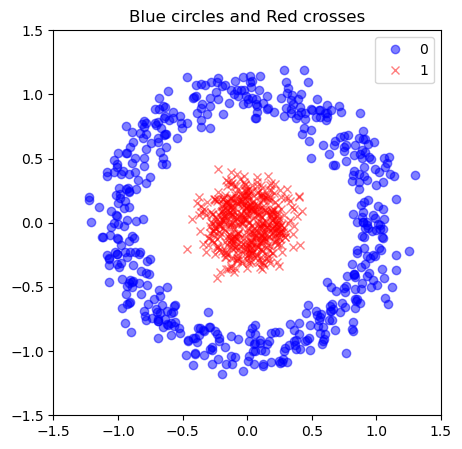

In [29]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [30]:
# Hier worden de punten gevisualiseerd met Matplotlib. 
# De punten worden geplot als blauwe cirkels ('ob') en rode kruizen ('xr'). 
# De alpha parameter bepaalt de transparantie van de punten. 
# Vervolgens worden de grenzen van de plot ingesteld en een legende en titel toegevoegd.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 484us/step - loss: 0.6795 - accuracy: 0.6720
Epoch 2/20
32/32 [==============================] - 0s 419us/step - loss: 0.6066 - accuracy: 0.7670
Epoch 3/20
32/32 [==============================] - 0s 419us/step - loss: 0.4899 - accuracy: 0.8760
Epoch 4/20
32/32 [==============================] - 0s 419us/step - loss: 0.3710 - accuracy: 0.9330
Epoch 5/20
32/32 [==============================] - 0s 451us/step - loss: 0.2725 - accuracy: 0.9950
Epoch 6/20
32/32 [==============================] - 0s 452us/step - loss: 0.2032 - accuracy: 0.9990
Epoch 7/20
32/32 [==============================] - 0s 419us/step - loss: 0.1577 - accuracy: 1.0000
Epoch 8/20
32/32 [==============================] - 0s 419us/step - loss: 0.1275 - accuracy: 0.9990
Epoch 9/20
32/32 [==============================] - 0s 419us/step - loss: 0.1065 - accuracy: 0.9990
Epoch 10/20
32/32 [==============================] - 0s 419us/step - loss: 0.0912 - accuracy: 0.9990

In [32]:
# Nu begint het gedeelte dat een neuraal netwerk maakt en traint. 
# Eerst wordt een sequentiële model gedefinieerd. 
# Vervolgens worden de lagen van het model toegevoegd: 
# een invoerlaag met 2 neuronen (input_shape=(2,)), een verborgen laag met 4 neuronen en tanh activatiefunctie, 
# en een uitvoerlaag met 1 neuron en sigmoid activatiefunctie. 
# Het model wordt gecompileerd met Stochastic Gradient Descent (SGD) als optimizer en binair kruis-entropieverliesfunctie. 
# Het model wordt getraind op de gegevens X en y gedurende 20 epochs.

Text(0.5, 1.0, 'Blue circles and Red crosses')

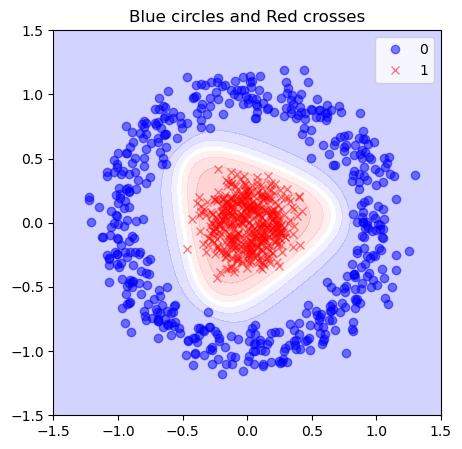

In [33]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [34]:
# Dit deel visualiseert de beslissingsgrens van het getrainde model. 
# Eerst worden roosterpunten gemaakt om te voorspellen met het model. 
# Vervolgens worden voorspellingen gedaan op deze roosterpunten en gevisualiseerd met een contourplot. 
# Daarna worden de originele punten geplot, net als eerder, maar nu bovenop de contourplot. 
# De legende en titel worden toegevoegd voor de plot.